In [126]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import metrics

print('finished imports')

finished imports


In [127]:
# cd C:\Users\pozzo\Desktop\SAC\Data Science\GA DS Immersive\Projects\project_4_hackathon\data

In [128]:
#initial look at data

eatz_0 = pd.read_csv("../data/train.csv")

print(eatz_0.shape)
eatz_0.head(3)

(137, 43)


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0


In [129]:
eatz_0.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [130]:
# check columns for compromised data; it's all good

eatz_0.isnull().sum();

## EDA Phase 1
## Inspect and engineer columns 

In [131]:
eatz_0.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

In [132]:
# inspect variable Open Date towards determing age of restaurants

gb_Open_date=eatz_0.groupby(['Open Date']).count()
gb_Open_date.shape
# type(eatz_0['Open Date'][0])


(134, 42)

In [133]:
# convert 'Open Date' to date format
# https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

eatz_0['Open Date']= pd.to_datetime(eatz_0['Open Date'])

In [134]:
# add an age column and inspect ditribution of ages  zzzzzzzzzz

eatz_0['open_year'] = eatz_0['Open Date'].dt.year
eatz_0['age'] = 2020 - eatz_0['open_year']
eatz_0['age'].describe()

count    137.000000
mean      11.321168
std        4.027359
min        6.000000
25%        9.000000
50%       10.000000
75%       13.000000
max       24.000000
Name: age, dtype: float64

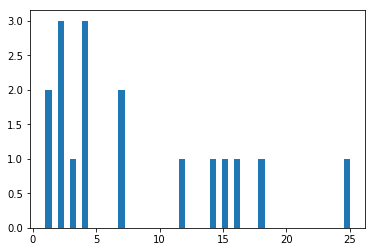

In [135]:
gb_age=eatz_0.groupby(['age']).count()
gb_age=eatz_0.groupby(['age']).count()

age_buff = gb_age['Id']
age_buff
plt.hist(age_buff, bins=50);
# gb_age
# gb_age.shape

In [136]:
# inspect categorical variable City Group; how many categories are there?
# There are two - Big Cities and Other
# Dummify

gb_City_Group=eatz_0.groupby(['City Group']).count()
gb_City_Group.shape

(2, 44)

In [137]:
# Dummify "City Group"

eatz_1 = pd.get_dummies(columns=["City Group"], drop_first=True, data=eatz_0)

In [138]:
# inspect categorical variable Type; how many categories are there?
# There are three - FC: Food Curt; IL: Inline (strip mall); DT: Drive-thru
# Dummify

gb_Type=eatz_0.groupby(['Type']).count()
gb_Type=eatz_0.groupby(['Type']).count()
gb_Type.shape

(3, 44)

In [139]:
# Dummify "Type"

eatz_1 = pd.get_dummies(columns=["Type"], drop_first=True, data=eatz_1)

In [140]:
eatz_1.columns

Index(['Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'revenue', 'open_year', 'age', 'City Group_Other', 'Type_FC',
       'Type_IL'],
      dtype='object')

In [141]:
col_name="revenue"
rev_col=eatz_1.pop(col_name)
eatz_1.insert(0, col_name, rev_col)
eatz_1.head(4)


,revenue,Id,Open Date,City,P1,P2,P3,P4,P5,P6,...,P33,P34,P35,P36,P37,open_year,age,City Group_Other,Type_FC,Type_IL
0,5653753.0,0,1999-07-17,İstanbul,4,5.0,4.0,4.0,2,2,...,5,5,4,3,4,1999,21,0,0,1
1,6923131.0,1,2008-02-14,Ankara,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,2008,12,0,1,0
2,2055379.0,2,2013-03-09,Diyarbakır,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,2013,7,1,0,1
3,2675511.0,3,2012-02-02,Tokat,6,4.5,6.0,6.0,4,4,...,6,18,12,12,6,2012,8,1,0,1


## EDA

## Null model

In [142]:
eatz_1['revenue'].mean()

4453532.613138686

In [143]:
# inspect data's descriptive statistics
eatz_1.describe()

,revenue,Id,P1,P2,P3,P4,P5,P6,P7,P8,...,P33,P34,P35,P36,P37,open_year,age,City Group_Other,Type_FC,Type_IL
count,1.370000e+02,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,4.453533e+06,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,...,1.138686,2.489051,2.029197,2.211679,1.116788,2008.678832,11.321168,0.430657,0.554745,0.437956
std,2.576072e+06,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,...,1.698540,5.165093,3.436272,4.168211,1.790768,4.027359,4.027359,0.496985,0.498818,0.497956
min,1.149870e+06,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1996.000000,6.000000,0.000000,0.000000,0.000000
25%,2.999068e+06,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,9.000000,0.000000,0.000000,0.000000
50%,3.939804e+06,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,10.000000,0.000000,1.000000,0.000000
75%,5.166635e+06,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,...,2.000000,3.000000,4.000000,3.000000,2.000000,2011.000000,13.000000,1.000000,1.000000,1.000000
max,1.969694e+07,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,...,6.000000,24.000000,15.000000,20.000000,8.000000,2014.000000,24.000000,1.000000,1.000000,1.000000


In [144]:
cols_list=eatz_1.columns
cols_list

Index(['revenue', 'Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'open_year', 'age', 'City Group_Other', 'Type_FC', 'Type_IL'],
      dtype='object')

In [145]:
features = ['revenue', 'Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'open_year', 'age', 'City Group_Other', 'Type_FC', 'Type_IL']

In [146]:
eatz_X=eatz_1[features]
Corrs=eatz_X.corr()
# Corrs['0']

# https://stackoverflow.com/questions/15360925/how-to-get-the-first-column-of-a-pandas-dataframe-as-a-series

# Corrs.columns
# Corrs.iloc[:,0].sort_values(by=['revenue'])

Corrs.sort_values(by=['revenue'], ascending=False)
# Corrs['revenue']

,revenue,Id,P1,P2,P3,P4,P5,P6,P7,P8,...,P33,P34,P35,P36,P37,open_year,age,City Group_Other,Type_FC,Type_IL
revenue,1.000000,-0.006277,0.070217,0.191518,-0.024613,0.035685,-0.028191,0.139094,0.051165,-0.084215,...,-0.032426,-0.072343,-0.050156,-0.050534,-0.019051,-0.326140,0.326140,-0.237403,0.100211,-0.096696
age,0.326140,0.117753,0.083658,0.169950,0.014200,-0.019542,-0.116705,0.187570,-0.006063,-0.040025,...,0.122428,0.085005,0.050855,0.101044,0.170121,-1.000000,1.000000,-0.176147,-0.085680,0.072339
P2,0.191518,-0.036991,0.836671,1.000000,0.473551,0.540322,0.203003,0.673106,0.769842,0.505116,...,0.234991,0.394319,0.314798,0.387938,0.161162,-0.169950,0.169950,-0.421095,-0.127136,0.141087
P28,0.155534,0.038232,0.843738,0.732712,0.643420,0.641971,0.323253,0.729083,0.739868,0.630284,...,0.264879,0.448928,0.341164,0.454263,0.215078,-0.127476,0.127476,-0.298842,-0.098448,0.106438
P6,0.139094,-0.025953,0.747296,0.673106,0.570486,0.595724,0.326524,1.000000,0.738388,0.720144,...,0.300611,0.519635,0.413645,0.524552,0.327594,-0.187570,0.187570,-0.416644,-0.153210,0.142112
Type_FC,0.100211,0.187543,-0.172760,-0.127136,-0.130387,-0.076744,-0.079878,-0.153210,-0.161572,-0.124121,...,-0.698966,-0.519892,-0.640112,-0.573217,-0.632805,0.085680,-0.085680,0.126652,1.000000,-0.985308
P21,0.097411,0.020577,0.654138,0.522294,0.559543,0.545285,0.342726,0.427613,0.604106,0.420807,...,0.373014,0.525638,0.437753,0.501181,0.273409,-0.111287,0.111287,-0.049982,-0.226397,0.228732
P11,0.084247,0.013573,0.542735,0.442719,0.417752,0.585285,0.435002,0.432959,0.503903,0.230823,...,0.244698,0.401866,0.291108,0.383485,0.158579,-0.100747,0.100747,-0.120045,-0.084635,0.094540
P22,0.083562,-0.046211,0.389116,0.476538,0.243983,0.076177,-0.198689,0.206913,0.270211,0.045803,...,0.178341,0.143249,0.156648,0.165467,0.108030,-0.178087,0.178087,-0.256669,-0.122137,0.137061
P1,0.070217,-0.026351,1.000000,0.836671,0.695928,0.677941,0.302820,0.747296,0.853753,0.760820,...,0.329795,0.570835,0.449182,0.554951,0.277601,-0.083658,0.083658,-0.258556,-0.172760,0.188354


### Correlations analysis

1. Strongest correlation to 'revenue' is age.  Since this is a feature that a new restaurant can't posses, by definition. this feauture should be ignored in prospective models.

2. Drop 'Id'


In [147]:
# plt.figure(figsize=(12,12))
# sns.heatmap(eatz_1.corr(), annot=True)
# sns.pairplot(eatz_1)

In [148]:
eatz_1.columns

Index(['revenue', 'Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'open_year', 'age', 'City Group_Other', 'Type_FC', 'Type_IL'],
      dtype='object')

In [149]:
features =['City Group_Other', 'Type_FC', 'Type_IL', 'P1', 'P2', 'P3', 'P4', 'P5',
           'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
           'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26','P27',
           'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36','P37'
          ]


# features =['City Group_Other', 'Type_FC', 'Type_IL', 'P2', 'P6', 'P8', 'P13', 'P28', 'P29'
#           ]

X = eatz_1[features]
y = eatz_1['revenue']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [151]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [152]:
lr.score(X_train, y_train)

0.3496862205640129

In [153]:
cross_val_score(lr, X_train, y_train, cv=5)

array([ -0.72519919,  -5.63616271,  -2.37674347, -11.61110037,
        -0.20814147])

In [154]:
lr.coef_

array([ -656046.46168901,  5646159.82438262,  5025851.32604196,
         416039.00077799,   -23165.90021218,  -617556.99267039,
        -230774.35645455,   245739.72604648,   868758.86694771,
         -18199.30482313, -1838690.00530743,  2053861.01490572,
        -237382.0611748 ,  -199711.1993639 ,  -375307.4012195 ,
         178643.17262378,   728915.6642588 ,  -608123.51411337,
         463055.44058069,  -353536.96156298,  -581173.78703253,
        -144472.61937839,  -537726.88840943,    -9835.13389608,
          14699.1296    ,   248983.57044968,  -674056.77449044,
         727050.62771536,  -152386.61401364,   236745.59859985,
         448214.76846674,  -101468.41756092,  -519100.71747927,
         -18158.57832163,  -429945.21547791,   392594.6445962 ,
         102317.16351055,   340911.75494852,   486425.74846733,
         230456.0001509 ])

In [155]:
X=sm.add_constant(X)
Model_sm=sm.OLS(y, X).fit()
    
    # coefficients from Statsmodel OLS model
# print(Model_sm.params)
Model_sm.params


C:\Users\pozzo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const               6.458371e+06
City Group_Other   -4.146876e+05
Type_FC             3.436356e+06
Type_IL             2.636833e+06
P1                  2.563537e+05
P2                  2.761244e+05
P3                 -3.630982e+05
P4                 -3.405258e+05
P5                  1.332828e+05
P6                  4.571744e+05
P7                 -1.005647e+05
P8                 -1.317284e+06
P9                  1.422309e+06
P10                 3.531449e+05
P11                -3.352833e+05
P12                -3.295610e+05
P13                -1.085242e+06
P14                -2.120118e+05
P15                 1.708861e+04
P16                -5.425277e+05
P17                 4.299483e+05
P18                 4.381641e+05
P19                -5.982755e+04
P20                -3.237102e+05
P21                 2.070479e+05
P22                -2.205112e+05
P23                 1.332048e+05
P24                 4.029045e+05
P25                 3.907887e+05
P26                -1.010536e+06
P27       

In [156]:
# Model_sm.mse_resid*Model_sm.nobs
# Model_sm.mse_resid
# # MSE**.5
# Model_sm.rsquared
# Model_sm.rsquared_adj   
# Model_sm.fvalue
# Model_sm.f_pvalue 
Model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.042
Date:                Mon, 02 Nov 2020   Prob (F-statistic):              0.424
Time:                        14:25:29   Log-Likelihood:                -2191.5
No. Observations:                 137   AIC:                             4465.
Df Residuals:                      96   BIC:                             4585.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6.458e+06    5.3e+06      1.218      0.226   -4.06e+06     1.7e+07
City Group_Other -4.147e+05   6.58e+05     -0.631      0.530   -1.72e+06    8.91e+05
Type_FC           3.436e+06   3.83e+06      0.898      0.372   -4.16e+06     1.1e+07
Type_IL           2.637e+06   3.83e+06      0.688      0.493   -4.97e+06    1.02e+07
P1                2.564e+05   3.61e+05      0.710      0.480   -4.61e+05    9.73e+05
P2                2.761e+05   3.95e+05      0.700      0.486   -5.07e+05    1.06e+06
P3               -3.631e+05   5.06e+05     -0.717      0.475   -1.37e+06    6.42e+05
P4               -3.405e+05   5.61e+05     -0.607      0.545   -1.45e+06    7.73e+05
P5                1.333e+05   4.04e+05      0.330      0.742   -6.69e+05    9.36e+05
P6                4.572e+05   2.69e+05      1.701      0.092   -7.64e+04    9.91e+05
P7               -1.006e+05   2.92e+05     -0.344      0.732   -6.81e+05     4.8e+05
P8               -1.317e+06   5.54e+05     -2.378      0.019   -2.42e+06   -2.18e+05
P9                1.422e+06    1.1e+06      1.296      0.198   -7.56e+05     3.6e+06
P10               3.531e+05   1.72e+06      0.205      0.838   -3.06e+06    3.76e+06
P11              -3.353e+05   3.17e+05     -1.059      0.292   -9.64e+05    2.93e+05
P12              -3.296e+05   7.11e+05     -0.464      0.644   -1.74e+06    1.08e+06
P13              -1.085e+06    1.6e+06     -0.676      0.501   -4.27e+06     2.1e+06
P14               -2.12e+05   3.62e+05     -0.585      0.560   -9.31e+05    5.07e+05
P15               1.709e+04   5.03e+05      0.034      0.973   -9.82e+05    1.02e+06
P16              -5.425e+05   5.74e+05     -0.945      0.347   -1.68e+06    5.97e+05
P17               4.299e+05   3.74e+05      1.149      0.253   -3.13e+05    1.17e+06
P18               4.382e+05   4.27e+05      1.027      0.307   -4.09e+05    1.28e+06
P19              -5.983e+04   1.49e+05     -0.401      0.689   -3.56e+05    2.36e+05
P20              -3.237e+05   1.88e+05     -1.726      0.088   -6.96e+05    4.86e+04
P21                2.07e+05   2.67e+05      0.774      0.441   -3.24e+05    7.38e+05
P22              -2.205e+05    2.8e+05     -0.788      0.433   -7.76e+05    3.35e+05
P23               1.332e+05   1.37e+05      0.974      0.333   -1.38e+05    4.05e+05
P24               4.029e+05   5.86e+05      0.687      0.493   -7.61e+05    1.57e+06
P25               3.908e+05   5.67e+05      0.689      0.492   -7.34e+05    1.52e+06
P26              -1.011e+06   6.33e+05     -1.597      0.113   -2.27e+06    2.45e+05
P27               1.015e+05   2.36e+05      0.430      0.668   -3.67e+05     5.7e+05
P28               4.735e+05   3.31e+05      1.432      0.155   -1.83e+05    1.13e+06
P29              -4.275e+04   3.53e+05     -0.121      0.904   -7.43e+05    6.58e+05
P30               8.152

In [157]:
# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\pozzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [158]:
ols = LinearRegression()
ols.fit(Z_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [159]:
print(ols.score(Z_train, y_train))
print(ols.score(Z_test, y_test))

0.3496862205640132
-2.8785547600556


In [ ]:
# Ridge regressor lives here:# Instantiate.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(Z_train, y_train)

# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv = ridge_model.fit(Z_train, y_train)

# Here is the optimal value of alpha
ridge_cv.alpha


In [161]:
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))

0.2406680389334773
0.00683523541935771


## KNN regressor model

In [ ]:
features =['City Group_Other', 'Type_FC', 'Type_IL', 'P1', 'P2', 'P3', 'P4', 'P5',
           'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
           'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26','P27',
           'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36','P37'
          ]


# features =['City Group_Other', 'Type_FC', 'Type_IL', 'P2', 'P6', 'P8', 'P13', 'P28', 'P29'
#           ]

X = eatz_1[features]
y = eatz_1['revenue']

In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
ss = StandardScaler()           # normalizes data to Z-score, stds from mean
ss.fit(X_train)                 # ONLY FIT TO X_TRAIN, NEVER TO TEST!!!!

# X_train_sc
X_train_sc = ss.transform(X_train)      # transform data to Z-score basis

# X_test_sc
X_test_sc = ss.transform(X_test)

In [ ]:
knn_gridsearch = GridSearchCV(estimator=KNeighborsRegressor(),
                              param_grid = {'n_neighbors': range(2, 4, 8),
                                              'metric': ['euclidean', 'manhattan']
                                              },
                              cv=5, # What number of folds in CV will we use?
                              verbose=1)

# Fit the GridSearchCV object to the data.
knn_gridsearch.fit(X_train_sc, y_train);